In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import numpy as np

In [5]:
from sklearn.datasets import make_blobs

In [21]:
X, y = make_blobs(n_samples = 500, centers = 4, random_state = 8, cluster_std = 2.4)

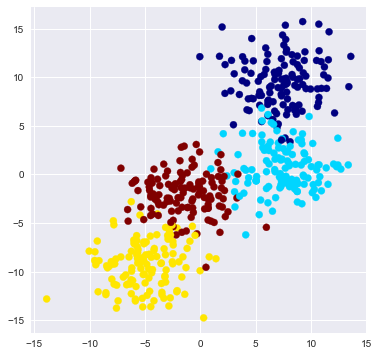

In [22]:
plt.figure(figsize = (6,6))
plt.scatter(X[:,0], X[:,1], c = y, s=50, cmap = 'jet')

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [37]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

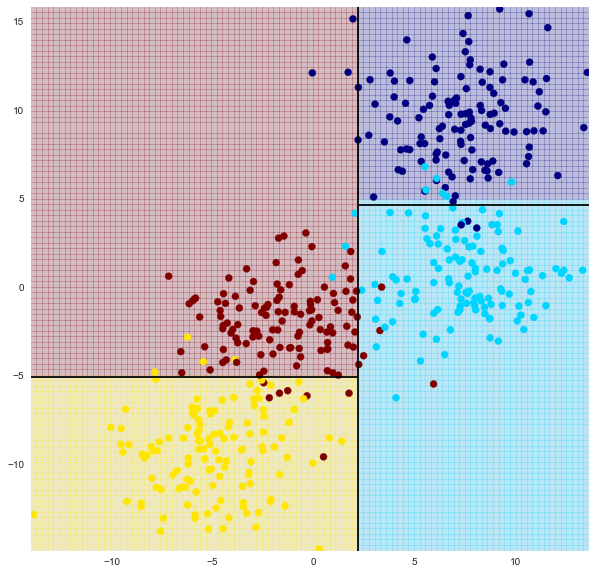

In [38]:
visualize_tree(clf, X, y, boundaries=True,xlim=None, ylim=None)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

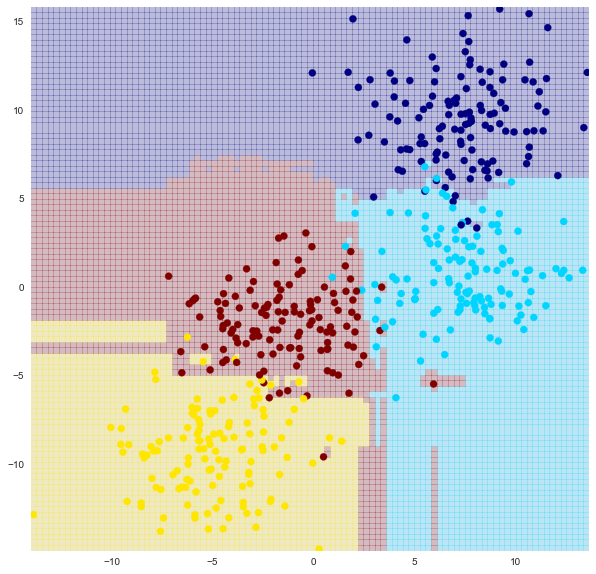

In [46]:
visualize_tree(clf, X, y, boundaries=False,xlim=None, ylim=None)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

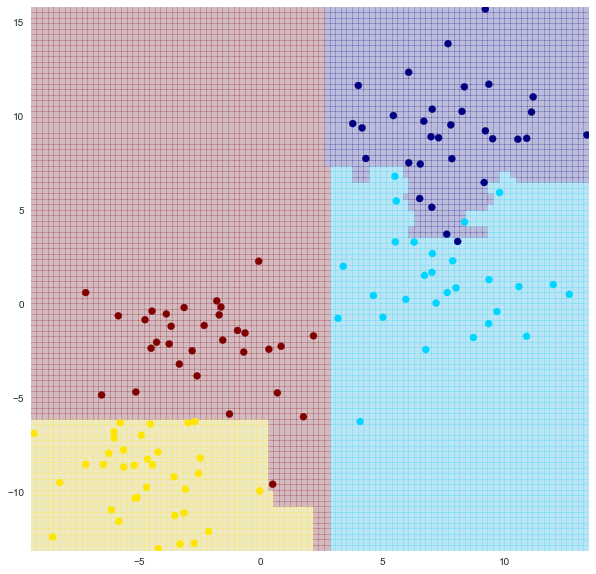

In [49]:
visualize_tree(clf, X_test, Y_test, boundaries=True,xlim=None, ylim=None)

In [50]:
x = 10*np.random.rand(100)

In [51]:
def sin_model(x, sigma=0.2):
    
    noise = sigma*np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5*x) + noise

In [53]:
y = sin_model(x)

<Container object of 3 artists>

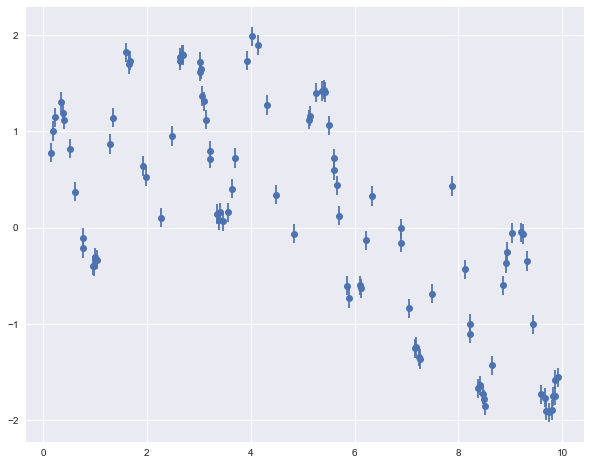

In [56]:
plt.figure(figsize = (10,8))
plt.errorbar(x,y,0.1, fmt='o')

In [63]:
xfit = np.linspace(0,10,1000)

from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr = RandomForestRegressor(100)

In [69]:
rfr.fit(x[:,None], y)
yfit = rfr.predict(xfit[:, None])
ytrue = sin_model(xfit,0)

In [74]:
xfit

array([  0.        ,   0.01001001,   0.02002002,   0.03003003,
         0.04004004,   0.05005005,   0.06006006,   0.07007007,
         0.08008008,   0.09009009,   0.1001001 ,   0.11011011,
         0.12012012,   0.13013013,   0.14014014,   0.15015015,
         0.16016016,   0.17017017,   0.18018018,   0.19019019,
         0.2002002 ,   0.21021021,   0.22022022,   0.23023023,
         0.24024024,   0.25025025,   0.26026026,   0.27027027,
         0.28028028,   0.29029029,   0.3003003 ,   0.31031031,
         0.32032032,   0.33033033,   0.34034034,   0.35035035,
         0.36036036,   0.37037037,   0.38038038,   0.39039039,
         0.4004004 ,   0.41041041,   0.42042042,   0.43043043,
         0.44044044,   0.45045045,   0.46046046,   0.47047047,
         0.48048048,   0.49049049,   0.5005005 ,   0.51051051,
         0.52052052,   0.53053053,   0.54054054,   0.55055055,
         0.56056056,   0.57057057,   0.58058058,   0.59059059,
         0.6006006 ,   0.61061061,   0.62062062,   0.63

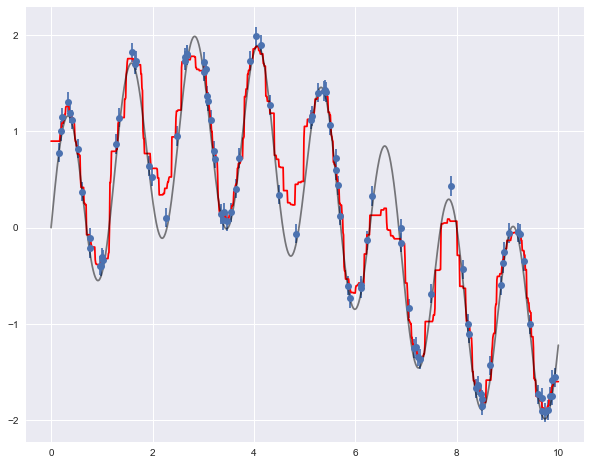

In [73]:
plt.figure(figsize = (10,8))
plt.errorbar(x,y,0.1, fmt='o')
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha =0.5 )